In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

ModuleNotFoundError: No module named 'sklearn'

### Gráficos

Principais bibliotecas:
* matplotlib
* Seaborn
* Bokeh
* Plotly

In [5]:
iris = pd.read_csv('IRIS.csv')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [10]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [29]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


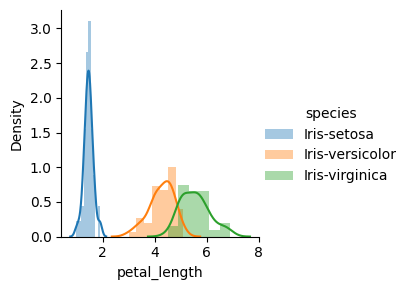

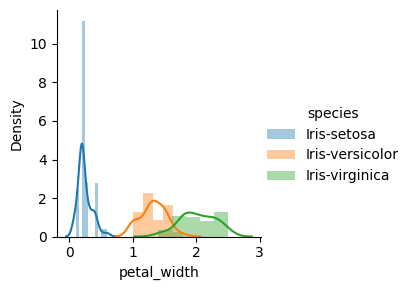

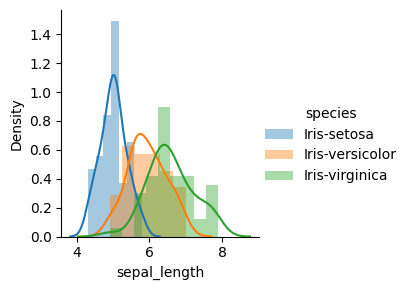

In [30]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

sns.FacetGrid(iris,hue="species").map(sns.distplot,"petal_length").add_legend()
sns.FacetGrid(iris,hue="species").map(sns.distplot,"petal_width").add_legend()
sns.FacetGrid(iris,hue="species").map(sns.distplot,"sepal_length").add_legend()
plt.show()

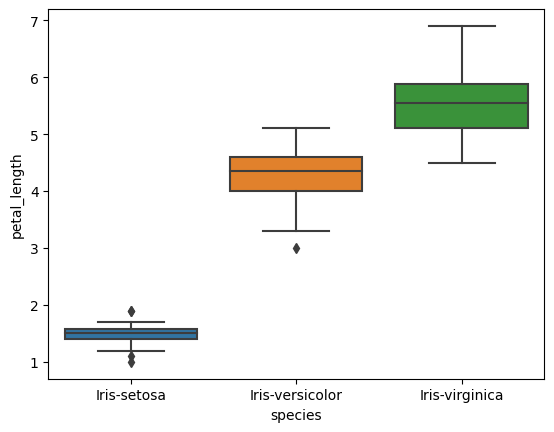

In [31]:
sns.boxplot(x="species",y="petal_length",data=iris)
plt.show()

<AxesSubplot: xlabel='petal_length', ylabel='Density'>

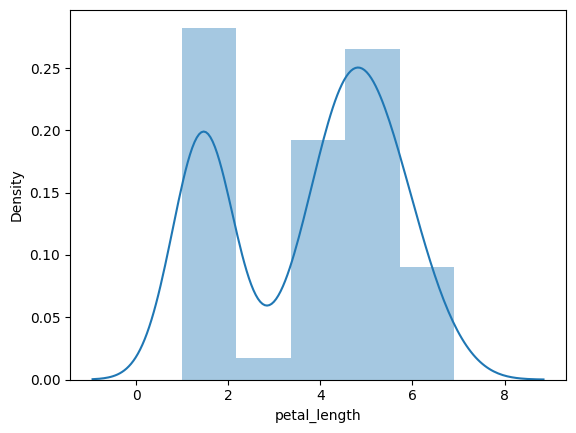

In [32]:
sns.distplot(iris['petal_length'])

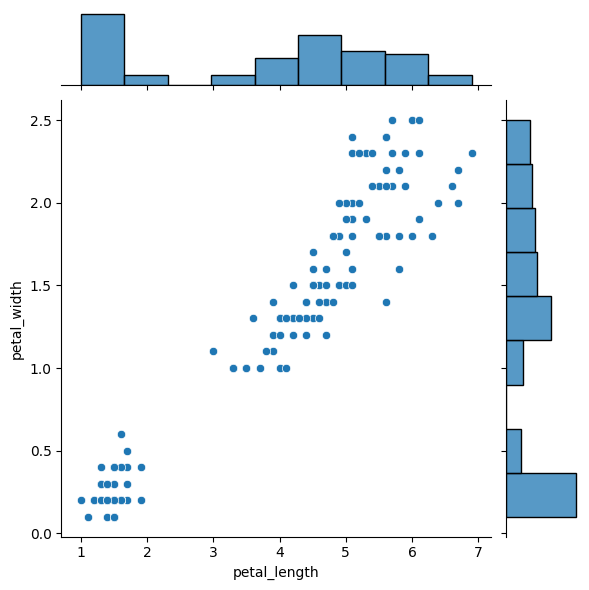

In [33]:
#kind = 'hex', hue='species', kind = 'reg',  kind = 'kde'
sns.jointplot(x = 'petal_length', y = 'petal_width', data = iris)

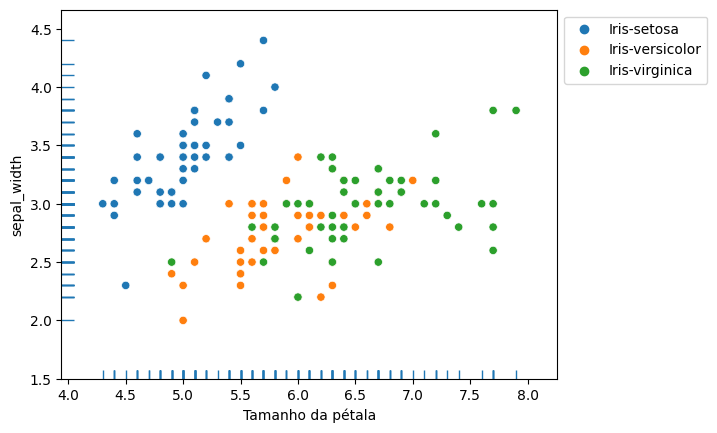

In [34]:
sns.scatterplot(x='sepal_length', y='sepal_width',
                hue='species', data=iris)
sns.rugplot(data=iris, x="sepal_length", y="sepal_width")
 
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.xlabel('Tamanho da pétala', fontdict=None, labelpad=None)
plt.show()

<AxesSubplot: xlabel='sepal_length', ylabel='Density'>

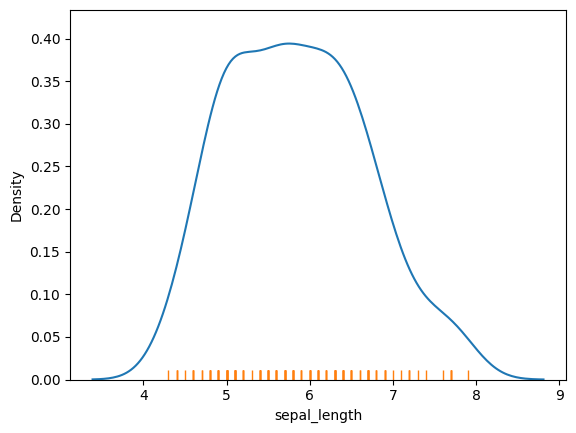

In [35]:
sns.kdeplot(data=iris, x="sepal_length")
sns.rugplot(data=iris, x="sepal_length")

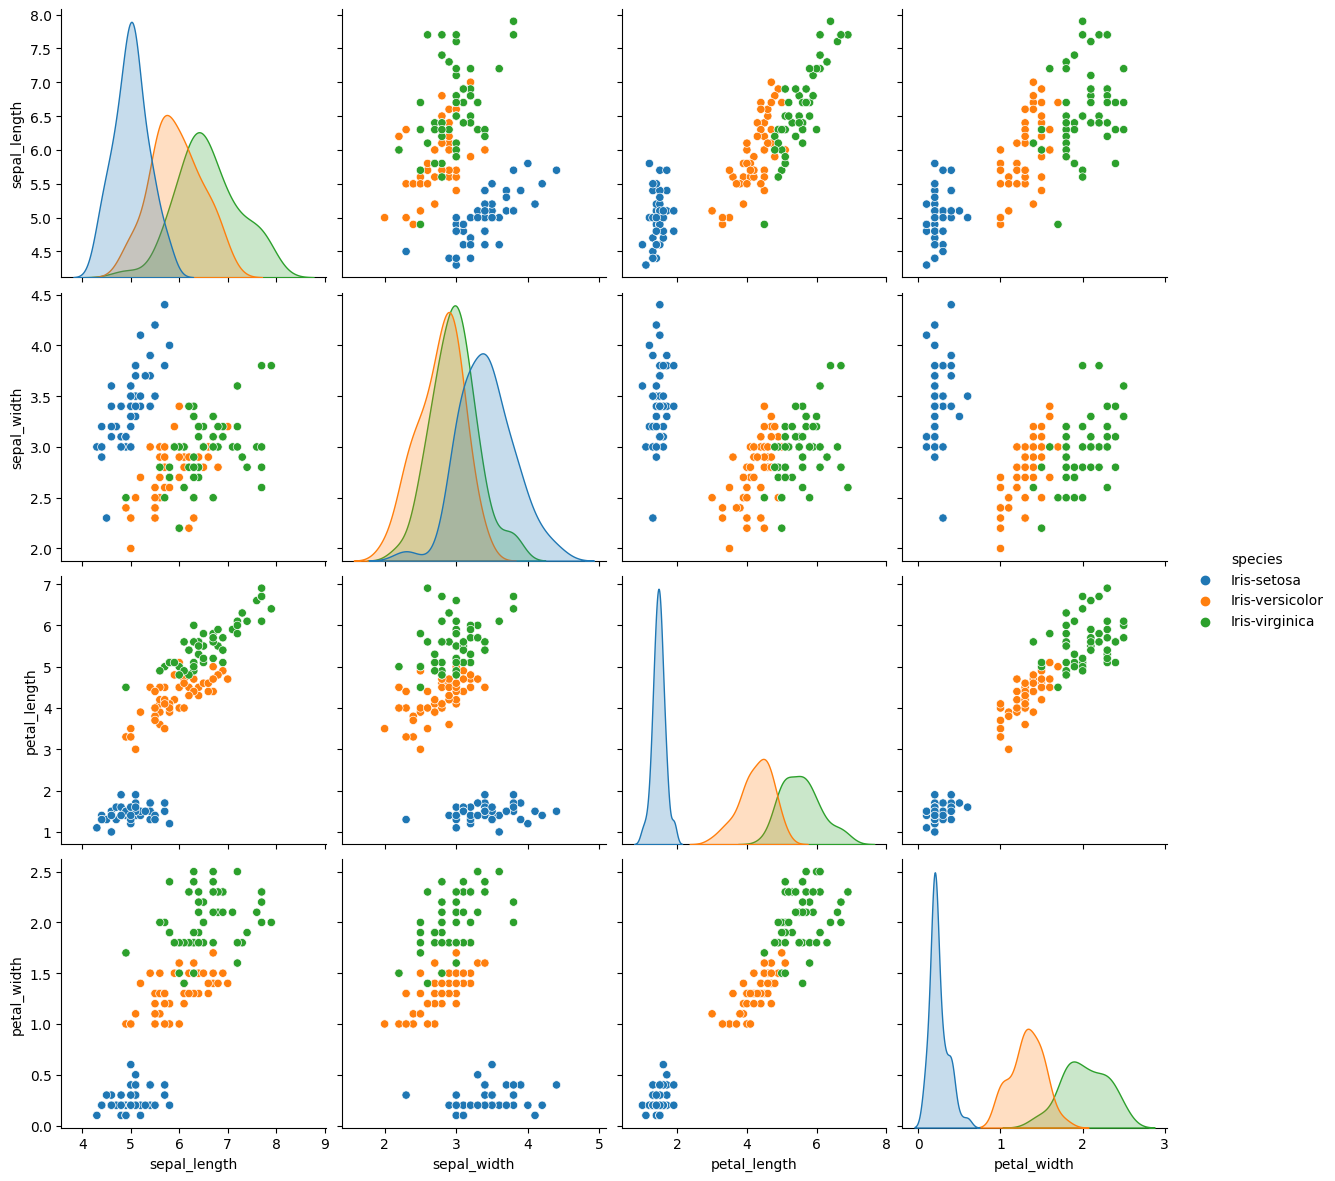

In [36]:
sns.pairplot(iris,hue="species",size=3);
plt.show()

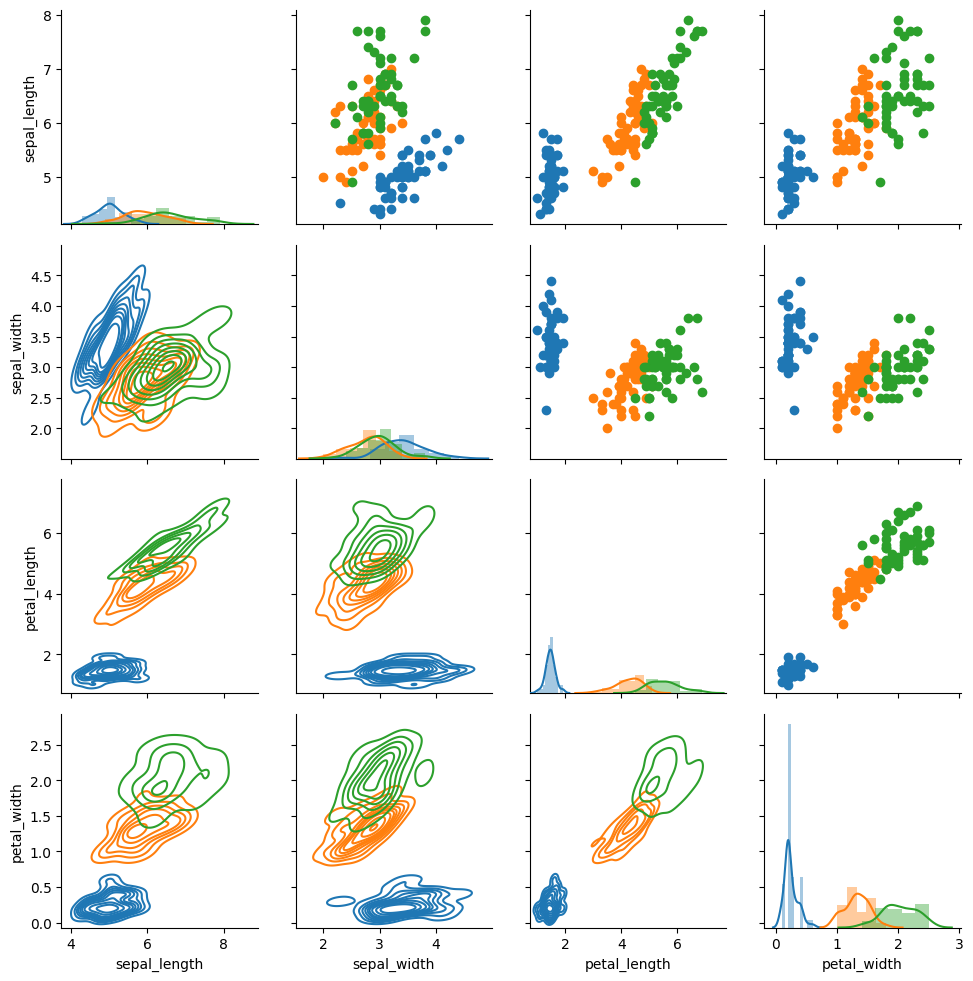

In [80]:
g = sns.PairGrid(iris,hue="species")
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

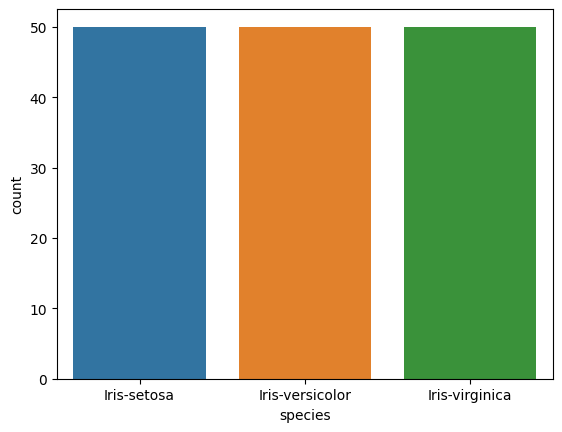

In [37]:
sns.countplot(x='species', data=iris)
plt.show()

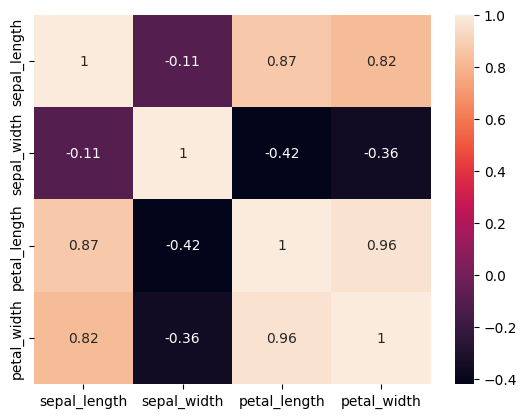

In [38]:
sns.heatmap(iris.corr(method='pearson'), annot = True);
plt.show()

<AxesSubplot: xlabel='carat', ylabel='price'>

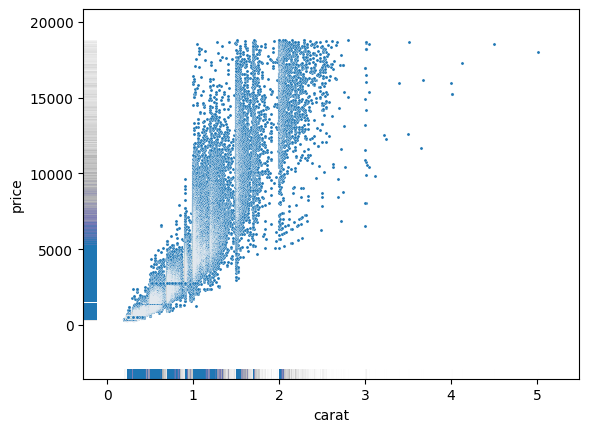

In [39]:
diamonds = sns.load_dataset("diamonds")
sns.scatterplot(data=diamonds, x="carat", y="price", s=5)
sns.rugplot(data=diamonds, x="carat", y="price", lw=1, alpha=.005)

Várias opções: https://www.python-graph-gallery.com

### Geolocalização

In [40]:
import pandas as pd
hoteis = pd.read_csv('/Users/anamees/Desktop/Hotel_Reviews.csv')
hoteis = hoteis.drop(['Additional_Number_of_Scoring','Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews', 'Review_Total_Positive_Word_Counts', 'Total_Number_of_Reviews_Reviewer_Has_Given', 'Tags', 'lat', 'lng'], axis=1)
hoteis = hoteis.iloc[[10,500,2300,3200, 4000, 5300]]
hoteis

,Hotel_Address,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Positive_Review,Reviewer_Score,days_since_review
10,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7/7/2017,7.7,Hotel Arena,United Kingdom,Nothing all great,Rooms were stunningly decorated and really sp...,10.0,27 days
500,1 15 Templeton Place Earl s Court Kensington a...,10/8/2016,8.5,K K Hotel George,United Kingdom,The bed mattress was too hard without the mat...,Staff were very helpful,7.9,299 day
2300,1 3 Queens Garden Westminster Borough London W...,10/24/2016,7.7,The Park Grand London Paddington,Singapore,No privacy The staff can come in any time alt...,Cleanliness is good Breakfast is good,8.3,283 day
3200,1 3 Queens Garden Westminster Borough London W...,8/30/2016,7.7,The Park Grand London Paddington,Ireland,the room which was a junior suite was way too...,No Positive,6.3,338 day
4000,1 8 Russell Square Camden London WC1B 5BE Unit...,3/10/2016,8.0,The Principal London,United Kingdom,Despite being on the 7th floor we couldn t be...,Lovely looking old building nice entrance are...,6.7,511 day
5300,1 Addington Street Lambeth London SE1 7RY Unit...,7/11/2017,8.4,Park Plaza County Hall London,United States of America,Air conditioning was a problem We had to let ...,upgraded our room went out of their way to qu...,10.0,23 days


In [41]:
# Calcular latitudes e longitudes dos hoteis
hoteis['Latitude'] = 0
hoteis['Longitude'] = 0

In [42]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='your unique UA')
for n in range(len(hoteis)):
    try:
        location = geolocator.geocode(hoteis['Hotel_Address'].iloc[n])
        hoteis['Latitude'].iloc[n] = location.latitude
        hoteis['Longitude'].iloc[n] = location.longitude
    except:
        pass

/var/folders/db/yx2qrvcn1wv5gxnkph9r0c680000gn/T/ipykernel_90385/90594951.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/db/yx2qrvcn1wv5gxnkph9r0c680000gn/T/ipykernel_90385/90594951.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [43]:
hoteis

,Hotel_Address,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Positive_Review,Reviewer_Score,days_since_review,Latitude,Longitude
10,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7/7/2017,7.7,Hotel Arena,United Kingdom,Nothing all great,Rooms were stunningly decorated and really sp...,10.0,27 days,52.360594,4.915953
500,1 15 Templeton Place Earl s Court Kensington a...,10/8/2016,8.5,K K Hotel George,United Kingdom,The bed mattress was too hard without the mat...,Staff were very helpful,7.9,299 day,51.492272,-0.195347
2300,1 3 Queens Garden Westminster Borough London W...,10/24/2016,7.7,The Park Grand London Paddington,Singapore,No privacy The staff can come in any time alt...,Cleanliness is good Breakfast is good,8.3,283 day,0.000000,0.000000
3200,1 3 Queens Garden Westminster Borough London W...,8/30/2016,7.7,The Park Grand London Paddington,Ireland,the room which was a junior suite was way too...,No Positive,6.3,338 day,0.000000,0.000000
4000,1 8 Russell Square Camden London WC1B 5BE Unit...,3/10/2016,8.0,The Principal London,United Kingdom,Despite being on the 7th floor we couldn t be...,Lovely looking old building nice entrance are...,6.7,511 day,51.522470,-0.125148
5300,1 Addington Street Lambeth London SE1 7RY Unit...,7/11/2017,8.4,Park Plaza County Hall London,United States of America,Air conditioning was a problem We had to let ...,upgraded our room went out of their way to qu...,10.0,23 days,51.501360,-0.116033


In [44]:
import numpy as np
hoteis = hoteis.replace(0, np.nan)
hoteis = hoteis.dropna(how='any', axis=0)
hoteis

,Hotel_Address,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Positive_Review,Reviewer_Score,days_since_review,Latitude,Longitude
10,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7/7/2017,7.7,Hotel Arena,United Kingdom,Nothing all great,Rooms were stunningly decorated and really sp...,10.0,27 days,52.360594,4.915953
500,1 15 Templeton Place Earl s Court Kensington a...,10/8/2016,8.5,K K Hotel George,United Kingdom,The bed mattress was too hard without the mat...,Staff were very helpful,7.9,299 day,51.492272,-0.195347
4000,1 8 Russell Square Camden London WC1B 5BE Unit...,3/10/2016,8.0,The Principal London,United Kingdom,Despite being on the 7th floor we couldn t be...,Lovely looking old building nice entrance are...,6.7,511 day,51.522470,-0.125148
5300,1 Addington Street Lambeth London SE1 7RY Unit...,7/11/2017,8.4,Park Plaza County Hall London,United States of America,Air conditioning was a problem We had to let ...,upgraded our room went out of their way to qu...,10.0,23 days,51.501360,-0.116033


In [45]:
import pyproj
import math

def lonlat_to_xy(lon, lat):
    proj_latlon = pyproj.Proj(proj='latlong')
    proj_xy = pyproj.Proj(proj='utm',zone=3)
    xy = pyproj.transform(proj_latlon, proj_xy, lon, lat)
    return xy[0], xy[1]

### Mapas

In [46]:
import folium

mapa = folium.Map([hoteis['Latitude'].median(),hoteis['Longitude'].median()],zoom_start=12, tiles= 'OpenStreetMap')
folium.TileLayer('stamentoner').add_to(mapa)
legenda = folium.FeatureGroup(name='Hoteis considerados', col='orange')
mapa.add_child(legenda)
folium.map.LayerControl('topleft', collapsed= False).add_to(mapa)

for index,row in hoteis.iterrows():
    folium.Marker([row['Latitude'],row['Longitude']],popup = row['Hotel_Name'], radius=1, color='blue').add_to(mapa)

mapa 

### Bibliotecas famosas: Altair, Bokeh, Folium e Plotly

In [77]:
import plotly.graph_objects as go

fig = go.Figure(go.Scattergeo())
fig.update_geos(
    resolution=50,
    showcoastlines=True, coastlinecolor="Purple",
    showland=False, landcolor="LightGreen",
    showocean=True, oceancolor="LightBlue",
    showlakes=True, lakecolor="Blue",
    showrivers=False, rivercolor="Blue"
)
fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [78]:
hoteis = pd.read_csv('/Users/anamees/Desktop/Hotel_Reviews.csv')
hoteis = hoteis.drop(['Additional_Number_of_Scoring','Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews', 'Review_Total_Positive_Word_Counts', 'Total_Number_of_Reviews_Reviewer_Has_Given', 'Tags', 'lat', 'lng'], axis=1)

Reviewer_Nat_Count = hoteis.Reviewer_Nationality.value_counts()
print(Reviewer_Nat_Count[:10])

 United Kingdom               245246
 United States of America      35437
 Australia                     21686
 Ireland                       14827
 United Arab Emirates          10235
 Saudi Arabia                   8951
 Netherlands                    8772
 Switzerland                    8678
 Germany                        7941
 Canada                         7894
Name: Reviewer_Nationality, dtype: int64


<AxesSubplot: >

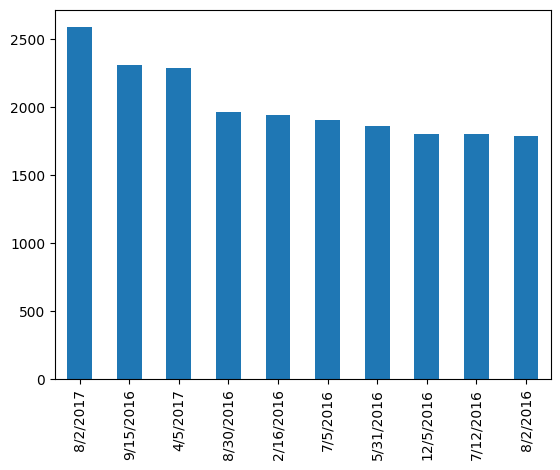

In [69]:
Review_Date_count = hoteis.Review_Date.value_counts()
Review_Date_count[:10].plot(kind='bar')

* ‘line’ : line plot (default)
* ‘bar’ : vertical bar plot
* ‘barh’ : horizontal bar plot
* ‘hist’ : histogram
* ‘box’ : boxplot
* ‘kde’ : Kernel Density Estimation plot
* ‘density’ : same as ‘kde’
* ‘area’ : area plot
* ‘pie’ : pie plot
* ‘scatter’ : scatter plot
* ‘hexbin’ : hexbin plot

In [ ]:
# Dois gráficos no mesmo plot
import matplotlib.pyplot as plt
from pandas import read_excel

plt.plot(df['A'], df['B'], linestyle='--', marker='o', color = 'blue', markersize = 4)
plt.plot(df['A'], df['D'], linestyle='--', marker='o', color = 'red', markersize = 4)

plt.xlabel('Tempo(minuto)', fontsize=15)
plt.ylabel('Temperatura °C', fontsize=15)
plt.title('Perfil de temperatura do forno')
plt.legend(['Perfil de temperatura do forno','Perfil de temperatura do forno'], fontsize=14)

plt.figure(figsize=(10.5, 9))
plt.show()

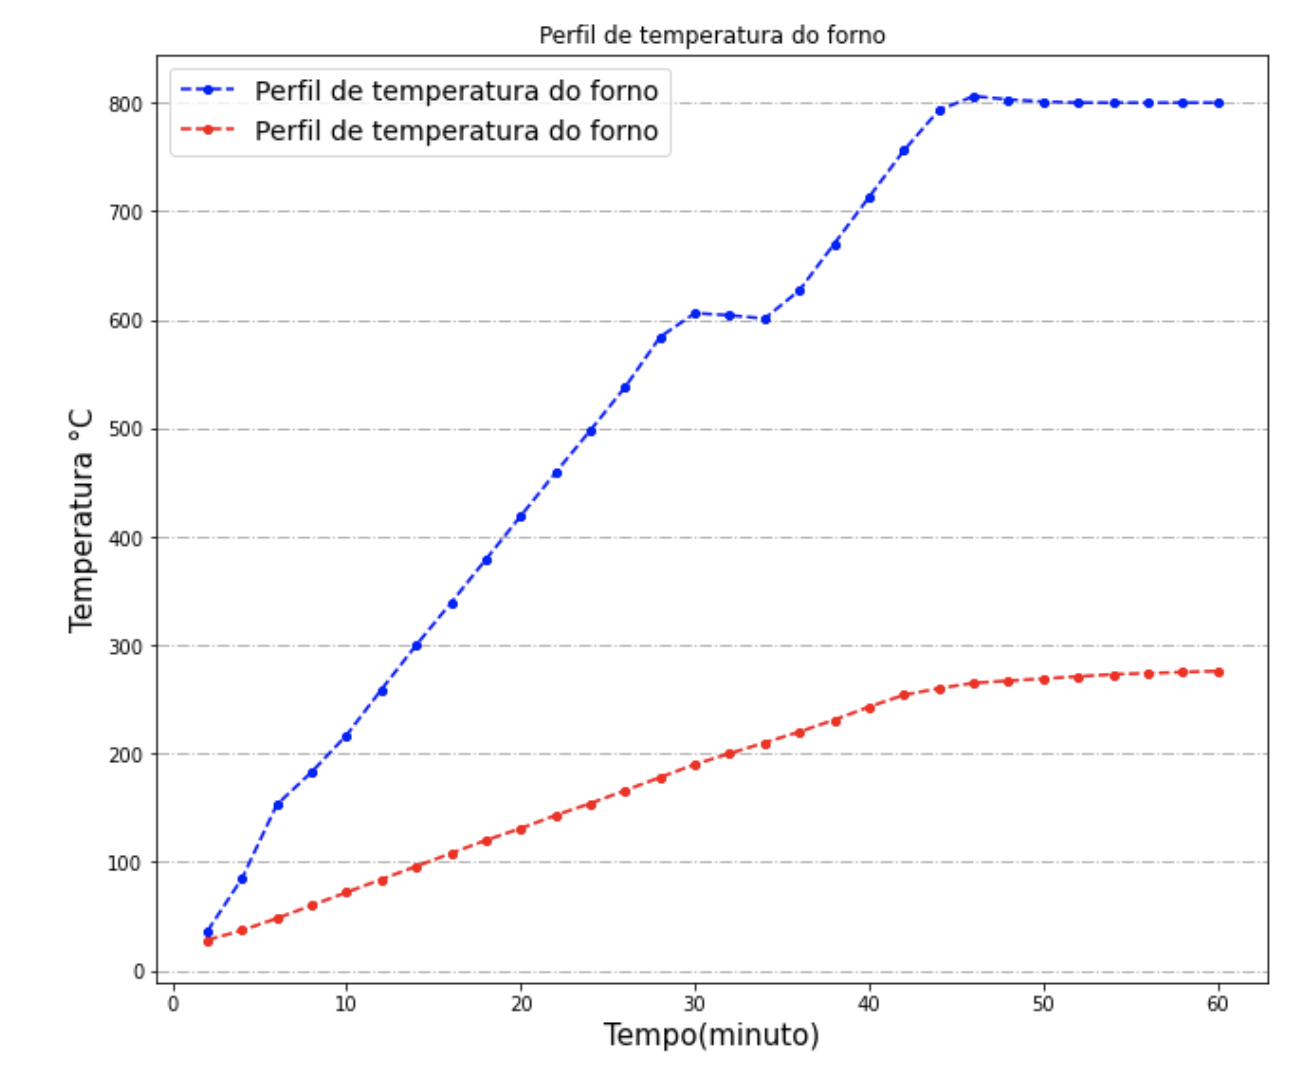

### Funções

In [70]:
def calcular_pagamento(qtd_horas, valor_hora):
    horas = float(qtd_horas)
    taxa = float(valor_hora)
    if horas <= 40:
        total=horas*taxa
    else:
        extra = horas - 40
        total = 40*taxa+(extra*(1.5*taxa))
    return total

In [71]:
total = calcular_pagamento(20, 50)
print('O valor total é R$',total)

O valor total é R$ 1000.0


O Python já tem muitas funções prontas! 
Documentação: https://docs.python.org/3/library/functions.html

### Recursão

In [72]:
def fatorial(numero):
    if numero == 1:
        return 1
    
    return numero * fatorial(numero - 1)

In [73]:
fatorial(5)

120

In [74]:
def fatorial_sem_base(numero):
    return numero * fatorial_sem_base(numero - 1)

In [75]:
fatorial_sem_base(5)

RecursionError: maximum recursion depth exceeded

In [93]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Clique aqui para ver as respostas"></form>''')

### Prática: Fibonacci
0, 1, 1, 2, 3, 5, 8, 13, 21, 34

Fn = Fn-1 + Fn-2

F0 = 0 and F1 = 1

In [94]:
def fib(n) :
    if n==0 :
        return 0
    elif n ==1 :
        return 1
    else :
        return fib(n-1) +fib(n-2)

### Prática: Divisor máximo comum de dois números

In [91]:

def GCD(a, b):
    low = min(a, b)
    high = max(a, b)

    if low == 0:
        return high
    elif low == 1:
        return 1
    else:
        return GCD(low, high%low)

### Desafio: triângulo de Pascal
Bordas como 1, números como soma dos dois acima

In [98]:
def pascal(n):
    if n == 1:
        return [1]
    else:
        line = [1]
        previous_line = pascal(n-1)
        for i in range(len(previous_line)-1):
            line.append(previous_line[i] + previous_line[i+1])
        line += [1]
    return line

#print(pascal(1))
#print(pascal(2))
#print(pascal(3))
#print(pascal(4))

### Desafio: Merge sort